<h1>Data Cleaning and Column overview</h1>
This Notebook is intended for data cleaning and outlier treating.

* Overall data is consicered to be correct.
* Some numerical values for Weather are missing, but the amount of missing rows is less 1% of whole Weather table and rows were filled with next velue per Region.
* Patient info is suffering from missing data, but no values were filled in or dropped.
* Policy Details and End_date often missing, but these columns are not esential, thus nothing was done further. 

In [5]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.request import urlopen
import json

In [6]:
def first_look(df):
    ### Performns initial data set analysis ###
    print(f'Column data types:\n{df.dtypes}\n')
    print(f'Dataset has {df.shape[0]} observations and {df.shape[1]} features')
    print(f'Columns with NULL values: {df.columns[df.isna().any()].tolist()}')

def Column_box_plot(df, feature):
    ### Box plot gragh for identifying numeric column outlier ###
    df.plot.box(figsize=(2, 3), title=f'{feature.capitalize()} ranges from {df[feature].min()} to {df[feature].max()}', y=[feature])

def column_clean(df, feature):
    ### Checking for unique values in columns ###
    return df[feature].unique()

def clean_date(df, feature):
    ### Cleaning Date columns ###
    df[feature] = pd.to_datetime(df[feature].replace(['-', ' '], np.nan), format='%Y-%m-%d')

def empty_row_proc(df, feature, whole_rows):
    ### Empty Row persentage counting ###
    print(f'{feature} empty rows: {round(df[df[feature].isna()].shape[0] / whole_rows * 100, 2)} %')

def column_name(df):
    ### Capitalize column names ###
    df.columns = df.columns.str.strip().str.capitalize()

<H1>Tables used: </H1>

1 Case Data
* Case: Data of COVID-19 infection cases in South Korea

2 Patient Data
* PatientInfo: Epidemiological data of COVID-19 patients in South Korea

3 Time Series Data
* Time: Time series data of COVID-19 status in South Korea
* TimeAge: Time series data of COVID-19 status in terms of the age in South Korea
* TimeGender: Time series data of COVID-19 status in terms of gender in South Korea
* TimeProvince: Time series data of COVID-19 status in terms of the Province in South Korea

4 Additional Data
* Region: Location and statistical data of the regions in South Korea
* Weather: Data of the weather in the regions of South Korea
* SearchTrend: Trend data of the keywords searched in NAVER which is one of the largest portals in South Korea
* Policy: Data of the government policy for COVID-19 in South Korea

<h1>Case</h1>
This dataset contains 8 features and 174 observations :<br>
Categorical: <br>

* Case_Id - Unique combination of region_code(5) and case_number(2)
* Province - Upper level (Provincial-level) divisions: Special City (Seoul), Metropolitan City, Province(-do)
* City - Lower level (Municipal-level) divisions: City(-si), Country(-gun), District(-gu)
* Group - True / False
* Infection_case - Name of case

Numeric: <br>
* Confirmed - Number of confirmed cases
* Latitude - the latitude of the group (WGS84)
* Longitude - the longitude of the group (WGS84)
<br>

Data set seams clean, no dublicates, no misspellings. City has values '-' which coincides with missing values for latitude and longitude

In [7]:
case = pd.read_csv(r"..\code\data\Case.csv")
column_name(case)
case.head(2)

,Case_id,Province,City,Group,Infection_case,Confirmed,Latitude,Longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384


In [8]:
first_look(case)

Column data types:
Case_id            int64
Province          object
City              object
Group               bool
Infection_case    object
Confirmed          int64
Latitude          object
Longitude         object
dtype: object

Dataset has 174 observations and 8 features
Columns with NULL values: []


In [9]:
column_clean(case, 'Province')

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [10]:
column_clean(case, 'City')

array(['Yongsan-gu', 'Gwanak-gu', 'Guro-gu', 'Yangcheon-gu', 'Dobong-gu',
       'from other city', 'Dongdaemun-gu', 'Eunpyeong-gu', 'Seongdong-gu',
       'Jongno-gu', 'Gangnam-gu', 'Jung-gu', 'Seodaemun-gu',
       'Geumcheon-gu', 'Yeongdeungpo-gu', 'Seocho-gu', 'Gangseo-gu', '-',
       'Dongnae-gu', 'Suyeong-gu', 'Haeundae-gu', 'Jin-gu', 'Nam-gu',
       'Dalseong-gun', 'Seo-gu', 'Dong-gu', 'Sejong', 'Seongnam-si',
       'Bucheon-si', 'Uijeongbu-si', 'Anyang-si', 'Suwon-si', 'Wonju-si',
       'Goesan-gun', 'Cheonan-si', 'Seosan-si', 'Muan-gun',
       'Cheongdo-gun', 'Bonghwa-gun', 'Gyeongsan-si', 'Yechun-gun',
       'Chilgok-gun', 'Gumi-si', 'Geochang-gun', 'Jinju-si',
       'Changwon-si', 'Changnyeong-gun', 'Yangsan-si'], dtype=object)

In [11]:
column_clean(case, 'Group')

array([ True, False])

City has values '-' which coincides with missing values for latitude and longitude

In [12]:
case[case['Longitude']=='-'].head(2)

,Case_id,Province,City,Group,Infection_case,Confirmed,Latitude,Longitude
6,1000007,Seoul,from other city,True,SMR Newly Planted Churches Group,36,-,-
8,1000009,Seoul,from other city,True,Coupang Logistics Center,25,-,-


Latitude and Longitude are expected to be Float. Topological data doesn't have outliers

In [13]:
case['Latitude']=case['Latitude'].replace('-', np.nan).astype(float)
case['Longitude']=case['Longitude'].replace('-', np.nan).astype(float)

Confirmed cases range 0 to 4511 cases per region. 4511 migth be concidered an outlier and will be further investigated

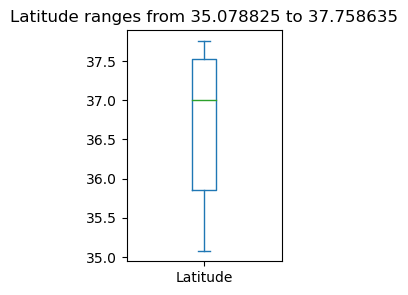

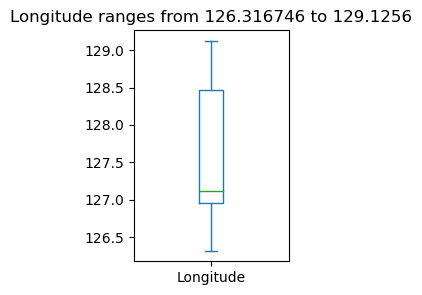

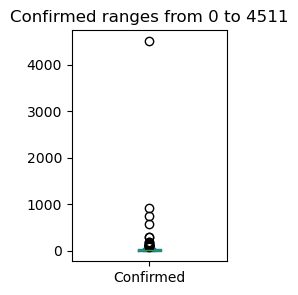

In [14]:
Column_box_plot(case, 'Latitude')
Column_box_plot(case, 'Longitude')
Column_box_plot(case, 'Confirmed')

<h1>Patient Info</h1>
This dataset contains patient info: 5165 observations and 14 features:<br>
Categorical: <br>

* Patient_id - Unique combination of region_code(5) and patient_number(2)
* Sex
* Age 
* Country 
* Province
* City
* Infection_case
* Infected_by - the ID of who infected the patient (refers to the 'Patient_id' column)
* State - isolated (in the hospital) / released (from the hospital) / deceased

Numeric: <br>
* Contact_number - Number of Contacts
* Symptom_onset_date
* Confirmed_date
* Released_date
* Deceased_date
<br>

In [15]:
patient_info = pd.read_csv(r"..\code\data\PatientInfo.csv")
column_name(patient_info)

clean_date(patient_info, 'Symptom_onset_date')
clean_date(patient_info, 'Confirmed_date')
clean_date(patient_info, 'Released_date')
clean_date(patient_info, 'Deceased_date')

patient_info['Contact_number'] = patient_info['Contact_number'].replace(['-', ' '], np.nan).astype(float)
patient_info['Age'] = patient_info['Age'].str.extract('(\d+)', expand=False)

patient_info.head(2)

,Patient_id,Sex,Age,Country,Province,City,Infection_case,Infected_by,Contact_number,Symptom_onset_date,Confirmed_date,Released_date,Deceased_date,State
0,1000000001,male,50,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaT,released
1,1000000002,male,30,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31.0,NaT,2020-01-30,2020-03-02,NaT,released


In [16]:
first_look(patient_info)

Column data types:
Patient_id                     int64
Sex                           object
Age                           object
Country                       object
Province                      object
City                          object
Infection_case                object
Infected_by                   object
Contact_number               float64
Symptom_onset_date    datetime64[ns]
Confirmed_date        datetime64[ns]
Released_date         datetime64[ns]
Deceased_date         datetime64[ns]
State                         object
dtype: object

Dataset has 5165 observations and 14 features
Columns with NULL values: ['Sex', 'Age', 'City', 'Infection_case', 'Infected_by', 'Contact_number', 'Symptom_onset_date', 'Confirmed_date', 'Released_date', 'Deceased_date']


This table is missing a lot of values. Some Deseased patiens are missing Deceased_date.

In [17]:
patient_info[((patient_info['State'] == 'deceased') & patient_info['Deceased_date'].isna())].head()

,Patient_id,Sex,Age,Country,Province,City,Infection_case,Infected_by,Contact_number,Symptom_onset_date,Confirmed_date,Released_date,Deceased_date,State
12,1000000013,male,80,Korea,Seoul,Jongno-gu,contact with patient,1000000017,117.0,NaT,2020-02-16,NaT,NaT,deceased
108,1000000109,male,90,Korea,Seoul,etc,contact with patient,NaN,NaN,2020-03-02,2020-03-07,NaT,NaT,deceased
284,1000000285,male,40,Korea,Seoul,Mapo-gu,Guro-gu Call Center,NaN,NaN,NaT,2020-03-19,NaT,NaT,deceased
472,1000000473,male,60,Korea,Seoul,etc,contact with patient,1000000443,NaN,NaT,2020-03-31,NaT,NaT,deceased
996,1000000997,NaN,NaN,Korea,Seoul,Seodaemun-gu,NaN,NaN,NaN,NaT,2020-06-08,NaT,NaT,deceased


In [18]:
patient_info_rows = patient_info.shape[0]
empty_row_proc(patient_info, 'Sex', patient_info_rows)
empty_row_proc(patient_info, 'Age', patient_info_rows)
empty_row_proc(patient_info, 'City', patient_info_rows)
empty_row_proc(patient_info, 'Infection_case', patient_info_rows)
empty_row_proc(patient_info, 'Infected_by', patient_info_rows)
empty_row_proc(patient_info, 'Contact_number', patient_info_rows)
empty_row_proc(patient_info, 'Symptom_onset_date', patient_info_rows)
empty_row_proc(patient_info, 'Confirmed_date', patient_info_rows)
empty_row_proc(patient_info, 'Released_date', patient_info_rows)
empty_row_proc(patient_info, 'Deceased_date', patient_info_rows)

Sex empty rows: 21.72 %
Age empty rows: 26.72 %
City empty rows: 1.82 %
Infection_case empty rows: 17.79 %
Infected_by empty rows: 73.94 %
Contact_number empty rows: 84.76 %
Symptom_onset_date empty rows: 86.66 %
Confirmed_date empty rows: 0.06 %
Released_date empty rows: 69.27 %
Deceased_date empty rows: 98.72 %


In [19]:
column_clean(patient_info, 'Sex')

array(['male', 'female', nan], dtype=object)

In [20]:
column_clean(patient_info, 'Age')

array(['50', '30', '20', '60', '80', '70', '40', '10', '90', '0', nan,
       '100'], dtype=object)

In [21]:
column_clean(patient_info, 'Country')

array(['Korea', 'China', 'United States', 'France', 'Thailand', 'Canada',
       'India', 'Switzerland', 'Germany', 'Indonesia', 'Vietnam',
       'Foreign', 'Mongolia', 'United Kingdom', 'Spain', 'Bangladesh'],
      dtype=object)

In [22]:
column_clean(patient_info, 'Province')

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Gyeonggi-do', 'Sejong', 'Ulsan', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [23]:
column_clean(patient_info, 'Country')

array(['Korea', 'China', 'United States', 'France', 'Thailand', 'Canada',
       'India', 'Switzerland', 'Germany', 'Indonesia', 'Vietnam',
       'Foreign', 'Mongolia', 'United Kingdom', 'Spain', 'Bangladesh'],
      dtype=object)

Overseas inflow cases don't have values for Infected_by

In [24]:
patient_info[patient_info['Infected_by'].isna()].head()

,Patient_id,Sex,Age,Country,Province,City,Infection_case,Infected_by,Contact_number,Symptom_onset_date,Confirmed_date,Released_date,Deceased_date,State
0,1000000001,male,50,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaT,released
1,1000000002,male,30,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31.0,NaT,2020-01-30,2020-03-02,NaT,released
3,1000000004,male,20,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaT,released
7,1000000008,male,20,Korea,Seoul,etc,overseas inflow,NaN,0.0,NaT,2020-02-02,2020-02-24,NaT,released
8,1000000009,male,30,Korea,Seoul,Songpa-gu,overseas inflow,NaN,68.0,NaT,2020-02-05,2020-02-21,NaT,released


In [25]:
column_clean(patient_info, 'State')

array(['released', 'deceased', 'isolated'], dtype=object)

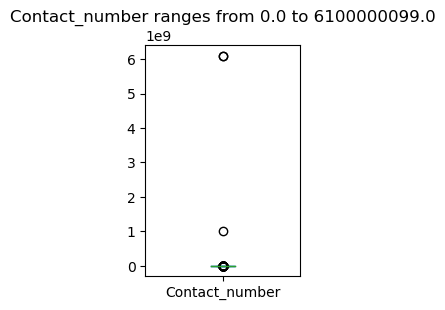

In [26]:
Column_box_plot(patient_info, 'Contact_number')

<h1>Time</h1>
This dataset contains COVID-19 status in South Korea: 163 observations and 7 features:<br>

Numeric: <br>
* Date
* Time - of KCDV to open information (12AM or 16 AM). This feature has been dropped

Numeric features on accumulated numbers:
* Test - the accumulated number of tests
* Negative
* Confirmed
* Released
* Deceased

<br>

In [27]:
time = pd.read_csv(r"..\code\data\Time.csv")
column_name(time)
time=time.drop(columns='Time')
clean_date(time, 'Date')

time.head(2)

OSError: [Errno 9] Bad file descriptor: '..\\code\\data\\Time.csv'

In [ ]:
first_look(time)

Column data types:
Date         datetime64[ns]
Test                  int64
Negative              int64
Confirmed             int64
Released              int64
Deceased              int64
dtype: object

Dataset has 163 observations and 6 features
Columns with NULL values: []


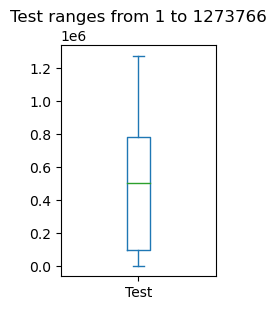

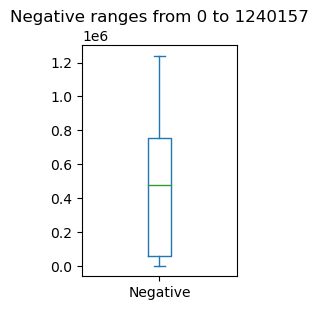

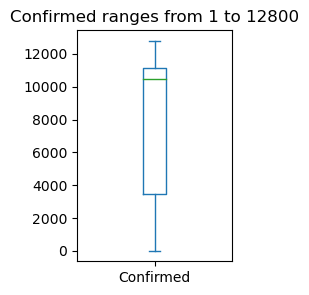

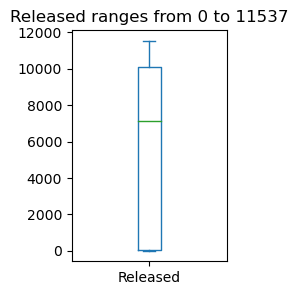

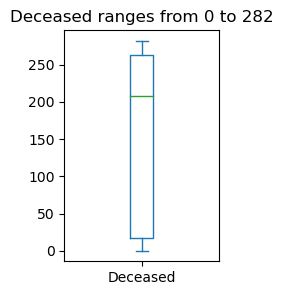

In [ ]:
Column_box_plot(time, 'Test')
Column_box_plot(time, 'Negative')
Column_box_plot(time, 'Confirmed')
Column_box_plot(time, 'Released')
Column_box_plot(time, 'Deceased')

<h1>TimeAge</h1>
This dataset contains COVID-19 status in South Korea (for age groups): 163 observations and 6 features:<br>

Categorical: <br>
* Age - patient age group

Numeric: <br>
* Date
* Time - 12AM. This feature has been dropped
* Confirmed
* Deceased

<br>

In [ ]:
time_age = pd.read_csv(r"..\code\data\TimeAge.csv")
column_name(time_age)

time_age=time_age.drop(columns='Time')
clean_date(time_age, 'Date')

time_age.head(2)

,Date,Age,Confirmed,Deceased
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0


In [ ]:
first_look(time_age)

Column data types:
Date         datetime64[ns]
Age                  object
Confirmed             int64
Deceased              int64
dtype: object

Dataset has 1089 observations and 4 features
Columns with NULL values: []


In [ ]:
column_clean(time_age, 'Age')

array(['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'],
      dtype=object)

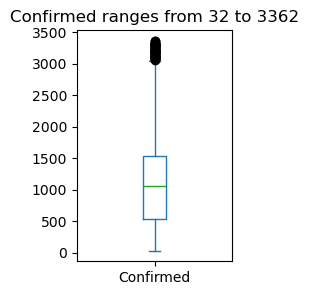

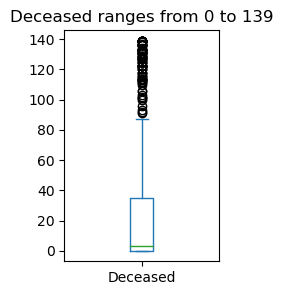

In [ ]:
Column_box_plot(time_age, 'Confirmed')
Column_box_plot(time_age, 'Deceased')

<h1>TimeGender</h1>
This dataset contains COVID-19 status in South Korea (for sex groups): 242 observations and 5 features:<br>

Categorical: <br>
* Sex - patient gender group

Numeric: <br>
* Date
* Time - 12AM. This feature has been dropped
* Confirmed
* Deceased

<br>

In [ ]:
time_gender = pd.read_csv(r"..\code\data\TimeGender.csv")
column_name(time_gender)

time_gender=time_gender.drop(columns='Time')
clean_date(time_gender, 'Date')

time_gender.head(2)

,Date,Sex,Confirmed,Deceased
0,2020-03-02,male,1591,13
1,2020-03-02,female,2621,9


In [ ]:
first_look(time_gender)

Column data types:
Date         datetime64[ns]
Sex                  object
Confirmed             int64
Deceased              int64
dtype: object

Dataset has 242 observations and 4 features
Columns with NULL values: []


In [ ]:
column_clean(time_gender, 'Sex')

array(['male', 'female'], dtype=object)

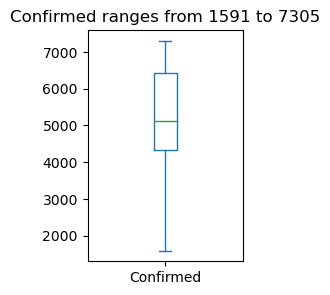

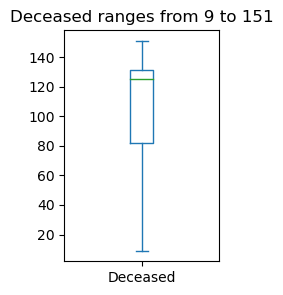

In [ ]:
Column_box_plot(time_gender, 'Confirmed')
Column_box_plot(time_gender, 'Deceased')

<h1>TimeProvince</h1>
This dataset contains COVID-19 status in Provonces of South Korea: 242 observations and 5 features:<br>

Categorical: <br>
* Province

Numeric: <br>
* Date
* Time - 12AM or 16PM. This feature has been dropped
* Confirmed
* Released
* Deceased

<br>

In [ ]:
time_province = pd.read_csv(r"..\code\data\TimeProvince.csv")
column_name(time_province)

time_province=time_province.drop(columns='Time')
clean_date(time_province, 'Date')

time_province.head(2)

,Date,Province,Confirmed,Released,Deceased
0,2020-01-20,Seoul,0,0,0
1,2020-01-20,Busan,0,0,0


In [ ]:
first_look(time_province)

Column data types:
Date         datetime64[ns]
Province             object
Confirmed             int64
Released              int64
Deceased              int64
dtype: object

Dataset has 2771 observations and 5 features
Columns with NULL values: []


In [ ]:
column_clean(time_province, 'Province')

array(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

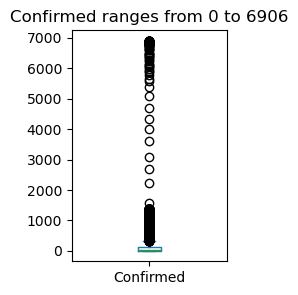

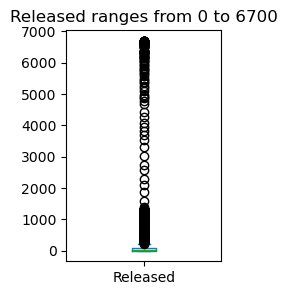

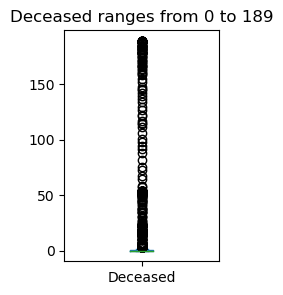

In [ ]:
Column_box_plot(time_province, 'Confirmed')
Column_box_plot(time_province, 'Released')
Column_box_plot(time_province, 'Deceased')

<h1>Region</h1>
This dataset contains data on infrastructure: 244 observations and 11 features:<br>
Categorical: <br>

* Code - region_code(5)
* Province
* City

Numeric: <br>
* Latitude - the latitude of the visit (WGS84)
* Longitude - the longitude of the visit (WGS84)
* Elementary_school_count
* Kindergarten_count
* University_count
* Academy_ratio
* Elderly_population_ratio
* Elderly_alone_ratio
* Nursing_home_count
<br>

Outlier is Korea as a whole region, this row will be remeved

In [ ]:
region = pd.read_csv(r"..\code\data\Region.csv")
column_name(region)
region.head(2)

,Code,Province,City,Latitude,Longitude,Elementary_school_count,Kindergarten_count,University_count,Academy_ratio,Elderly_population_ratio,Elderly_alone_ratio,Nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088


In [ ]:
first_look(region)

Column data types:
Code                          int64
Province                     object
City                         object
Latitude                    float64
Longitude                   float64
Elementary_school_count       int64
Kindergarten_count            int64
University_count              int64
Academy_ratio               float64
Elderly_population_ratio    float64
Elderly_alone_ratio         float64
Nursing_home_count            int64
dtype: object

Dataset has 244 observations and 12 features
Columns with NULL values: []


In [ ]:
column_clean(region, 'Province')

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do',
       'Korea'], dtype=object)

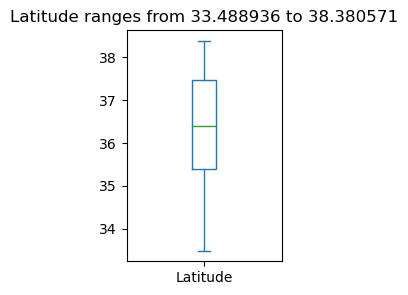

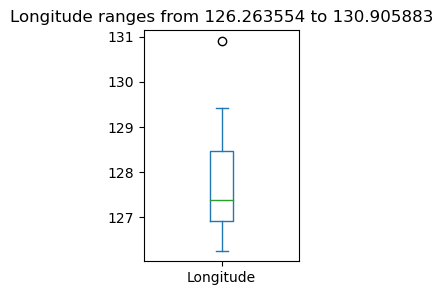

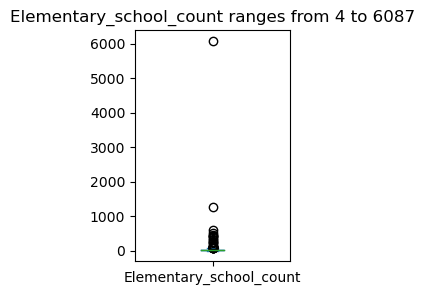

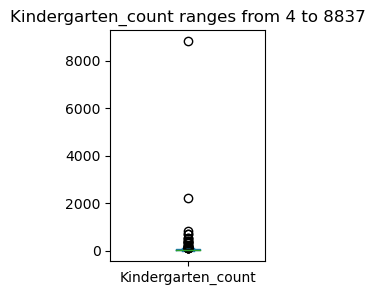

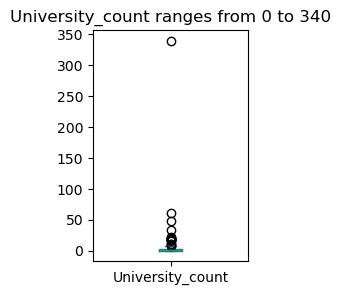

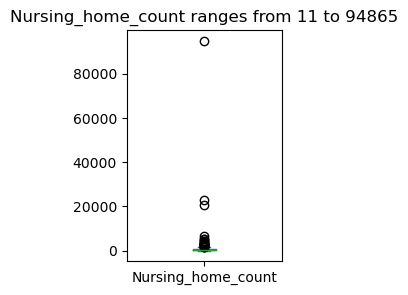

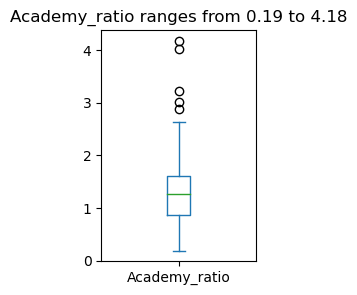

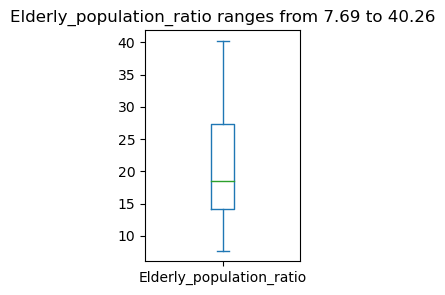

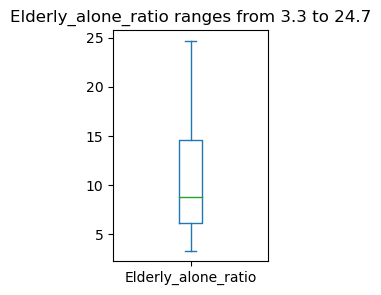

In [ ]:
Column_box_plot(region, 'Latitude')
Column_box_plot(region, 'Longitude')
Column_box_plot(region, 'Elementary_school_count')
Column_box_plot(region, 'Kindergarten_count')
Column_box_plot(region, 'University_count')
Column_box_plot(region, 'Nursing_home_count')
Column_box_plot(region, 'Academy_ratio')
Column_box_plot(region, 'Elderly_population_ratio')
Column_box_plot(region, 'Elderly_alone_ratio')

In [ ]:
region[region['Elementary_school_count'] == region['Elementary_school_count'].max()]

,Code,Province,City,Latitude,Longitude,Elementary_school_count,Kindergarten_count,University_count,Academy_ratio,Elderly_population_ratio,Elderly_alone_ratio,Nursing_home_count
243,80000,Korea,Korea,37.566953,126.977977,6087,8837,340,1.56,15.67,7.2,94865


In [ ]:
region = region[region['Province'] != 'Korea']

<h1>Weather</h1>
This dataset contains data on infrastructure: 26271 observations and 10 features:<br>
Categorical: <br>

* Code - region_code(5)
* Province

Numeric: <br>
* Date
* Avg_temp
* Min_temp
* Max_temp
* Precipitation - the daily precipitation
* Max_wind_speed
* Most_wind_direction -the most frequent wind direction
* Avg_relative_humidity
<br>

Some data is missing, but weather is hard to predict and filling rows with past days values would be misleading.

In [ ]:
weather = pd.read_csv(r"..\code\data\Weather.csv")
column_name(weather)
clean_date(weather, 'Date')
weather.head(2)

,Code,Province,Date,Avg_temp,Min_temp,Max_temp,Precipitation,Max_wind_speed,Most_wind_direction,Avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1


In [ ]:
first_look(weather)

Column data types:
Code                              int64
Province                         object
Date                     datetime64[ns]
Avg_temp                        float64
Min_temp                        float64
Max_temp                        float64
Precipitation                   float64
Max_wind_speed                  float64
Most_wind_direction             float64
Avg_relative_humidity           float64
dtype: object

Dataset has 26271 observations and 10 features
Columns with NULL values: ['Avg_temp', 'Min_temp', 'Max_temp', 'Max_wind_speed', 'Most_wind_direction', 'Avg_relative_humidity']


In [ ]:
weather_rows = weather.shape[0]

Missing rows in each column don't amount to 1% of total Table row count, empty rows will be filled with the next value of same Province

In [ ]:
empty_row_proc(weather, 'Avg_temp', weather_rows)
empty_row_proc(weather, 'Min_temp', weather_rows)
empty_row_proc(weather, 'Max_temp', weather_rows)
empty_row_proc(weather, 'Max_wind_speed', weather_rows)
empty_row_proc(weather, 'Most_wind_direction', weather_rows)
empty_row_proc(weather, 'Avg_relative_humidity', weather_rows)

Avg_temp empty rows: 0.06 %
Min_temp empty rows: 0.02 %
Max_temp empty rows: 0.01 %
Max_wind_speed empty rows: 0.03 %
Most_wind_direction empty rows: 0.11 %
Avg_relative_humidity empty rows: 0.08 %


In [ ]:
weather['Avg_temp'] = weather.groupby('Code')['Avg_temp'].fillna(method='ffill')
weather['Min_temp'] = weather.groupby('Code')['Min_temp'].fillna(method='ffill')
weather['Max_temp'] = weather.groupby('Code')['Max_temp'].fillna(method='ffill')
weather['Precipitation'] = weather.groupby('Code')['Precipitation'].fillna(method='ffill')
weather['Max_wind_speed'] = weather.groupby('Code')['Max_wind_speed'].fillna(method='ffill')
weather['Most_wind_direction'] = weather.groupby('Code')['Most_wind_direction'].fillna(method='ffill')
weather['Avg_relative_humidity'] = weather.groupby('Code')['Avg_relative_humidity'].fillna(method='ffill')

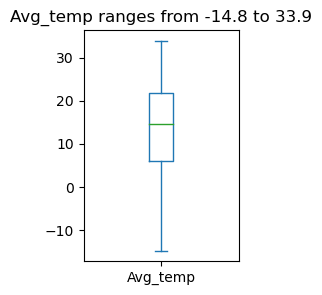

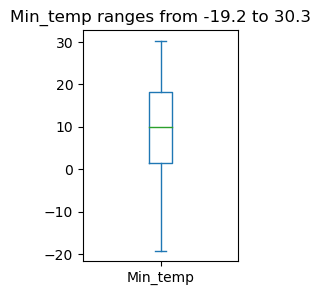

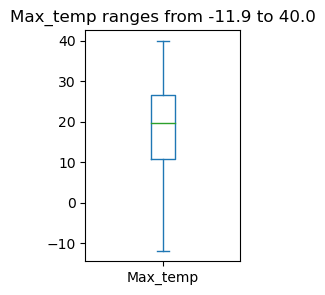

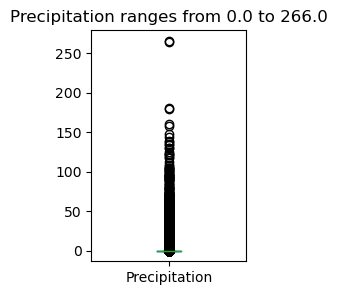

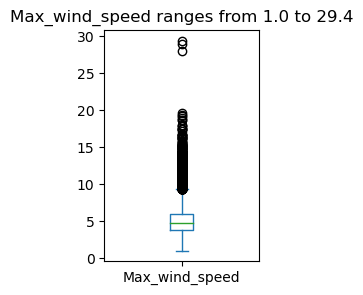

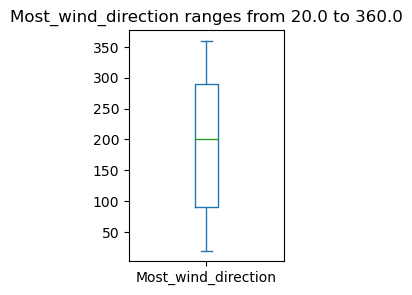

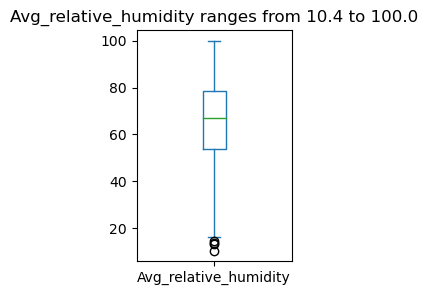

In [ ]:
Column_box_plot(weather, 'Avg_temp')
Column_box_plot(weather, 'Min_temp')
Column_box_plot(weather, 'Max_temp')
Column_box_plot(weather, 'Precipitation')
Column_box_plot(weather, 'Max_wind_speed')
Column_box_plot(weather, 'Most_wind_direction')
Column_box_plot(weather, 'Avg_relative_humidity')

Precipitation might be concidered for outliers, but the date is outside Covid-19 period, so this point won't be further investigated.

In [ ]:
weather[weather['Precipitation'] == weather['Precipitation'].max()]

,Code,Province,Date,Avg_temp,Min_temp,Max_temp,Precipitation,Max_wind_speed,Most_wind_direction,Avg_relative_humidity
4454,16000,Ulsan,2016-10-05,20.6,18.3,23.8,266.0,12.6,360.0,91.9


<h1>Search Trend</h1>
Trend data of the keywords searched in NAVER which is one of the largest portal in South Korea: 1642 observations and 5 features:<br>

Numeric: <br>
* Date

Relative periodic volume freaquence (up to 100) for word search on:<br>
* Cold
* Flu 
* Pneumonia
* Coronavirus


In [ ]:
search = pd.read_csv(r"..\code\data\SearchTrend.csv") 
column_name(search)
clean_date(search, 'Date')
search.head(2)

,Date,Cold,Flu,Pneumonia,Coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890


In [ ]:
first_look(search)

Column data types:
Date           datetime64[ns]
Cold                  float64
Flu                   float64
Pneumonia             float64
Coronavirus           float64
dtype: object

Dataset has 1642 observations and 5 features
Columns with NULL values: []


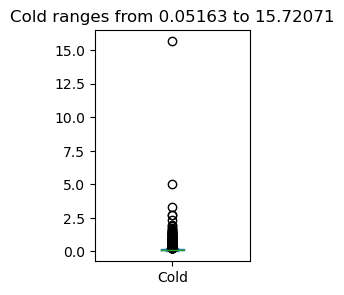

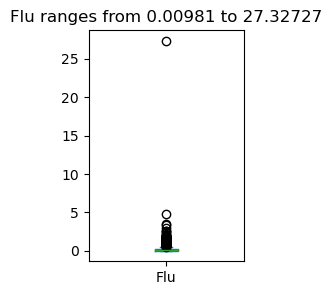

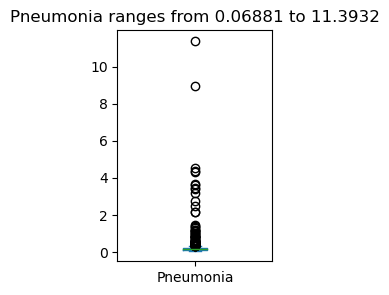

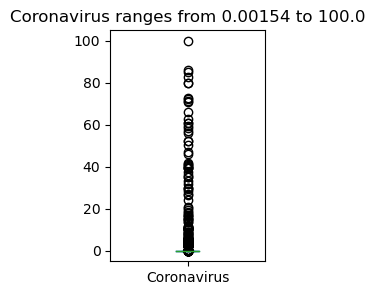

In [ ]:
Column_box_plot(search, 'Cold')
Column_box_plot(search, 'Flu')
Column_box_plot(search, 'Pneumonia')
Column_box_plot(search, 'Coronavirus')

'Cold' and 'Pneumonia' reached it's peak during Covid Period, so it's peak is not an outlier.

'Flu' reached it's peak before Covid-19 start.

In [ ]:
search[(search['Cold'] == search['Cold'].max())
       | (search['Flu'] == search['Flu'].max())
       | (search['Pneumonia'] == search['Pneumonia'].max())
       ]

,Date,Cold,Flu,Pneumonia,Coronavirus
354,2016-12-20,0.37553,27.32727,0.32780,0.02436
1165,2019-03-11,15.72071,0.15381,0.16272,0.00836
1468,2020-01-08,0.19490,0.81824,11.39320,0.02636


<h1>Policy</h1>
Data of the government policy for COVID-19 in South Korea: 61 observations and 7 features:<br>

Categorical: <br>
* Policy_id - the ID of the policy. Column will be droped.
* Country - Korea. Column will be droped.
* Type - the type of the policy
* Government_Policy - the policy of the government
* Detail - policy details. Some rows are missing 3.28% of values, but this column is non esentail and nothing will be done furder.

Numeric: <br>
* Start_date - the start date of the policy
* End_date - the end date of the policy

In [ ]:
policy = pd.read_csv(r"..\code\data\Policy.csv") 
column_name(policy)

policy=policy.rename(columns={'Gov_policy':'Government_Policy'}).drop(columns=['Policy_id', 'Country'])
clean_date(policy, 'Start_date')
clean_date(policy, 'End_date')

policy.head(2)

,Type,Government_Policy,Detail,Start_date,End_date
0,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27


In [ ]:
first_look(policy)

Column data types:
Type                         object
Government_Policy            object
Detail                       object
Start_date           datetime64[ns]
End_date             datetime64[ns]
dtype: object

Dataset has 61 observations and 5 features
Columns with NULL values: ['Detail', 'End_date']


In [ ]:
column_clean(policy, 'Type')

array(['Alert', 'Immigration', 'Health', 'Social', 'Education',
       'Technology', 'Administrative', 'Transformation'], dtype=object)

In [ ]:
column_clean(policy, 'Government_Policy')

array(['Infectious Disease Alert Level', 'Special Immigration Procedure',
       'Mandatory 14-day Self-Quarantine',
       'Mandatory Self-Quarantine & Diagonostic Tests',
       'Emergency Use Authorization of Diagnostic Kit',
       'Drive-Through Screening Center', 'Mask Distribution',
       'Social Distancing Campaign', 'Thanks to Challenge korea',
       'School Closure', 'School Opening Delay',
       'School Opening with Online Class', 'Open Data ', 'Open API',
       'Self-Diagnosis App', 'Self-Quarantine Safety Protection App',
       'Electronic Wristbands', 'Close bars and clubs',
       'local government Administrative orders', 'Close karaoke',
       'Logistics center', 'Wearing of masks',
       'KI-Pass: Korea Internet - Pass',
       'Extends Tightened Quarantine Measures '], dtype=object)

In [ ]:
column_clean(policy, 'Detail')

array(['Level 1 (Blue)', 'Level 2 (Yellow)', 'Level 3 (Orange)',
       'Level 4 (Red)', 'from China', 'from Hong Kong', 'from Macau',
       'from Japan', 'from Italy', 'from Iran', 'from France',
       'from Germany', 'from Spain', 'from U.K.', 'from Netherlands',
       'from Europe', 'from all the countries', 'from U.S.', '1st EUA',
       '2nd EUA', '3rd EUA', '4th EUA', '5th EUA', 'by Local Government',
       'Standard Operating Procedures', 'Public-Sale',
       '5-day Rotation System', 'Strong', 'Weak', 'Weak(1st)',
       'Relay Cheer Campaign in SNS', 'Daycare Center for Children',
       'Kindergarten', 'High School', 'Middle School',
       'Elementary School', 'High School (3rd grade)',
       'High School (2nd grade)', 'High School (1st grade)',
       'Middle School (3rd grade)', 'Middle School (2nd grade)',
       'Middle School (1st grade)', 'Elementary School (5th ~ 6th grade)',
       'Elementary School (4th grade)', 'Elementary School (3rd grade)',
       'Element

In [ ]:
empty_row_proc(policy, 'Detail', policy.shape[0])

Detail empty rows: 3.28 %


<h1>GoeJson</h1>

In [ ]:
geo_json=r"https://raw.githubusercontent.com/southkorea/southkorea-maps/master/gadm/json/skorea-provinces-geo.json"

with urlopen(geo_json) as response:
    counties = json.load(response)

### checking goejson has the same province names ###
goejson_provinces = []
province_dist=case[['Province','Confirmed']].groupby('Province').sum('Confirmed').reset_index()

for i in range(len(counties['features'])): goejson_provinces.append(counties['features'][i]['properties']['NAME_1'])
json_df=pd.DataFrame(goejson_provinces, columns=['json_Province'])

name_check=pd.merge(json_df, province_dist['Province'], left_on='json_Province', right_on='Province', how='outer')
name_check[name_check['Province'].isnull() | name_check['json_Province'].isnull()]

,json_Province,Province
11,Jeju,NaN
16,NaN,Jeju-do
17,NaN,Sejong


In [ ]:
for i in range(len(counties['features'])): 
    if counties['features'][i]['properties']['NAME_1'] == 'Jeju': 
        counties['features'][i]['properties']['NAME_1'] = 'Jeju-do'